In [1]:
import mne 
from PyQt6 import QtCore, QtWidgets
from mne.preprocessing import ICA
from tools.quality_check import bridging_test
from tools.pipeline import erps
from tools.pipeline import Cropping, Sequence, Rereference, AutoICA, FilterBandpass, SetMontage, Interpolate
from mne_icalabel import label_components
%matplotlib qt

c:\Users\searg\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
import importlib
import tools.pipeline
import tools.montages
importlib.reload(tools.montages)
importlib.reload(tools.pipeline)
folder = 'data/086/'
elc_file = folder+'INP0086_v1.4_S002_27.12.23.elc'
raw_file = folder+'INP0086_v4.1_ANT_S002_26.12.23.vhdr'
raw = mne.io.read_raw_brainvision(raw_file, preload=True)
#bridging_test(raw, vis=True)

Extracting parameters from data/086/INP0086_v4.1_ANT_S002_26.12.23.vhdr...
Setting channel info structure...
Reading 0 ... 2442890  =      0.000 ...  1192.817 secs...


In [3]:
raw = SetMontage('personal', elc_file, mode='Cz', threshold=0.019)(raw)
#raw1.plot_sensors(show_names=True, kind='3d')
raw = raw.drop_channels(['M1', 'M2'])
transform_res = Sequence( FilterBandpass(low_freq=0.1, high_freq=40, method='firwin'),
                Cropping(stimulus=['Stimulus/s145', 'Stimulus/s200', 'Stimulus/s143', 
                                   'Stimulus/s149', 'Stimulus/s151', 'Stimulus/s147', 
                                   'Stimulus/s141', 'Stimulus/s153', 'Stimulus/s155']),
                Rereference('average'),)
raw_ref = transform_res(raw)

CHANNELS DROPPED: ['BIP1', 'EOG']
Used Annotations descriptions: ['Marker/Impedance', 'New Segment/', 'Stimulus/s1', 'Stimulus/s129', 'Stimulus/s140', 'Stimulus/s141', 'Stimulus/s142', 'Stimulus/s143', 'Stimulus/s144', 'Stimulus/s145', 'Stimulus/s146', 'Stimulus/s147', 'Stimulus/s148', 'Stimulus/s149', 'Stimulus/s150', 'Stimulus/s151', 'Stimulus/s152', 'Stimulus/s153', 'Stimulus/s154', 'Stimulus/s155', 'Stimulus/s200', 'Stimulus/s201', 'Stimulus/s202', 'Stimulus/s3', 'Stimulus/s4', 'Stimulus/s5', 'Stimulus/s7', 'Stimulus/s8', 'Stimulus/s9']


In [4]:
transform_ica = Sequence( FilterBandpass(low_freq=1, high_freq=100, notch_freq=50, method='firwin'),
                Cropping(stimulus=['Stimulus/s145', 'Stimulus/s200', 'Stimulus/s143', 
                                   'Stimulus/s149', 'Stimulus/s151', 'Stimulus/s147', 
                                   'Stimulus/s141', 'Stimulus/s153', 'Stimulus/s155']),
                Rereference('average'),)
raw_ica = transform_ica(raw)

Used Annotations descriptions: ['Marker/Impedance', 'New Segment/', 'Stimulus/s1', 'Stimulus/s129', 'Stimulus/s140', 'Stimulus/s141', 'Stimulus/s142', 'Stimulus/s143', 'Stimulus/s144', 'Stimulus/s145', 'Stimulus/s146', 'Stimulus/s147', 'Stimulus/s148', 'Stimulus/s149', 'Stimulus/s150', 'Stimulus/s151', 'Stimulus/s152', 'Stimulus/s153', 'Stimulus/s154', 'Stimulus/s155', 'Stimulus/s200', 'Stimulus/s201', 'Stimulus/s202', 'Stimulus/s3', 'Stimulus/s4', 'Stimulus/s5', 'Stimulus/s7', 'Stimulus/s8', 'Stimulus/s9']


In [5]:
n_components=15
ica = ICA(n_components=n_components, method='infomax', max_iter='auto', random_state=97, fit_params=dict(extended=True))
ica.fit(raw_ica)

Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 15 components
Computing Extended Infomax ICA
Fitting ICA took 342.7s.


Method,infomax
Fit parameters,extended=Truemax_iter=500
Fit,500 iterations on raw data (2051664 samples)
ICA components,15
Available PCA components,61
Channel types,eeg
ICA components marked for exclusion,—


In [6]:
#ica.plot_components()
#ica.plot_properties(raw_ica, picks=range(0, n_components))
#ica.plot_sources(raw_ica)
ica_labels = label_components(raw_ica, ica, method='iclabel')
labels = ica_labels["labels"]
probas = ica_labels['y_pred_proba']
threshold = 0
exclude_idx = [idx for idx, label in enumerate(labels) if label not in ["brain"] and probas[idx] > threshold]
#print(exclude_idx)
#ica.plot_overlay(raw_ref, exclude=exclude_idx)
raw_cleaned = ica.apply(raw_ref, exclude=exclude_idx)

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
500 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
500 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
500 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
500 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
500 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
500 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
500 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
500 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
500 matching events found
No baseline correction applied
0 pro

In [8]:
import importlib
import tools.pipeline
importlib.reload(tools.pipeline)
from tools.pipeline import erps
erps(raw_cleaned)

Used Annotations descriptions: ['Stimulus/s140', 'Stimulus/s141', 'Stimulus/s142', 'Stimulus/s143', 'Stimulus/s144', 'Stimulus/s145', 'Stimulus/s146', 'Stimulus/s147', 'Stimulus/s148', 'Stimulus/s149', 'Stimulus/s150', 'Stimulus/s151', 'Stimulus/s152', 'Stimulus/s153', 'Stimulus/s154', 'Stimulus/s155', 'Stimulus/s200', 'Stimulus/s201', 'Stimulus/s202']
Used Annotations descriptions: ['Stimulus/s140', 'Stimulus/s141', 'Stimulus/s142', 'Stimulus/s143', 'Stimulus/s144', 'Stimulus/s145', 'Stimulus/s146', 'Stimulus/s147', 'Stimulus/s148', 'Stimulus/s149', 'Stimulus/s150', 'Stimulus/s151', 'Stimulus/s152', 'Stimulus/s153', 'Stimulus/s154', 'Stimulus/s155', 'Stimulus/s200', 'Stimulus/s201', 'Stimulus/s202']
Удаленные эпохи C: []
Удаленные эпохи N: []
Used Annotations descriptions: ['Stimulus/s140', 'Stimulus/s141', 'Stimulus/s142', 'Stimulus/s143', 'Stimulus/s144', 'Stimulus/s145', 'Stimulus/s146', 'Stimulus/s147', 'Stimulus/s148', 'Stimulus/s149', 'Stimulus/s150', 'Stimulus/s151', 'Stimulus/

c:\Users\searg\OneDrive\Desktop\Experiments\tools\pipeline.py:69: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = plt.subplots(4, 2, figsize=(10, 15))  # Увеличенный размер для среднего графика


Used Annotations descriptions: ['Stimulus/s140', 'Stimulus/s141', 'Stimulus/s142', 'Stimulus/s143', 'Stimulus/s144', 'Stimulus/s145', 'Stimulus/s146', 'Stimulus/s147', 'Stimulus/s148', 'Stimulus/s149', 'Stimulus/s150', 'Stimulus/s151', 'Stimulus/s152', 'Stimulus/s153', 'Stimulus/s154', 'Stimulus/s155', 'Stimulus/s200', 'Stimulus/s201', 'Stimulus/s202']
Used Annotations descriptions: ['Stimulus/s140', 'Stimulus/s141', 'Stimulus/s142', 'Stimulus/s143', 'Stimulus/s144', 'Stimulus/s145', 'Stimulus/s146', 'Stimulus/s147', 'Stimulus/s148', 'Stimulus/s149', 'Stimulus/s150', 'Stimulus/s151', 'Stimulus/s152', 'Stimulus/s153', 'Stimulus/s154', 'Stimulus/s155', 'Stimulus/s200', 'Stimulus/s201', 'Stimulus/s202']
Удаленные эпохи C: []
Удаленные эпохи N: []


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from mne import pick_info, pick_types
from mne.viz import plot_topomap
from mne.viz.utils import _check_sphere
from matplotlib.colors import Normalize
from tqdm import tqdm 

def calculate_ed_matrix(raw, epoch_duration=2, l_freq=0.5, h_freq=30):
    inst = raw.copy()  # don't modify original
    picks = pick_types(inst.info, eeg=True)
    inst.filter(l_freq=l_freq, h_freq=h_freq, picks=picks, verbose=False)
    inst = mne.make_fixed_length_epochs(
            inst, duration=epoch_duration, preload=True, verbose=False
        )
    data = inst.get_data(picks=picks)
    n_epochs = data.shape[0]
    ed_matrix = np.zeros((n_epochs, picks.size, picks.size)) * np.nan
    for i in tqdm(range(picks.size), total=picks.size):
        for j in range(i + 1, picks.size):
            ed_matrix[:, i, j] = np.var(data[:, i] - data[:, j], axis=1)
    ed_matrix *= 1e12  # scale to muV**2
    ed_matrix = ed_matrix.copy()
    tril_idx = np.tril_indices(picks.size)
    for epo_idx in range(ed_matrix.shape[0]):
        ed_matrix[epo_idx][tril_idx] = ed_matrix[epo_idx].T[tril_idx]
    return ed_matrix

ed_matrix = calculate_ed_matrix(raw_cleaned, epoch_duration=2)

100%|██████████| 61/61 [00:43<00:00,  1.40it/s]


In [19]:
median_ed_matrix = np.nanmin(ed_matrix, axis=1)
plt.figure(figsize=(12, 8))
plt.imshow(median_ed_matrix.T, aspect='auto', cmap='viridis', vmax=60, interpolation='nearest')
plt.colorbar(label='Value')
plt.xlabel('Epochs')
plt.ylabel('Channels')
plt.title('Heatmap of ed_matrix')
plt.yticks(ticks=np.arange(len(raw_cleaned.ch_names)), labels=raw_cleaned.ch_names)
plt.xticks(ticks=np.arange(median_ed_matrix.shape[0]), labels=np.arange(1, median_ed_matrix.shape[0] + 1))
plt.show()

In [21]:
def compute_rm_percentage(data, rm_cutoff):
    n_windows, n_channels = data.shape
    # Инициализируем массив для подсчета превышений для каждого канала
    exceed_count = np.zeros(n_channels)
    for window in data:
        for i in range(n_channels):
            if window[i] > rm_cutoff:
                exceed_count[i] += 1
    # Вычисляем процент превышений для каждого канала
    exceed_percentage = exceed_count / n_windows
    return exceed_percentage
rm_cutoff = 50
exceed_percentage = compute_rm_percentage(median_ed_matrix, rm_cutoff)
print([(ch, val) for (ch, val) in list(zip(raw_cleaned.ch_names, exceed_percentage)) if val > 0.5])
print([(ch, val) for (ch, val) in list(zip(raw_cleaned.ch_names, np.median(median_ed_matrix, axis=0))) if val > 50])

[('CP5', 0.59), ('POz', 0.672), ('TP7', 0.586)]


In [144]:
bridging_test(raw_cleaned, vis=True)

[(3, 33),
 (4, 30),
 (21, 56),
 (24, 52),
 (24, 53),
 (24, 59),
 (50, 58),
 (52, 53),
 (52, 59),
 (53, 59)]

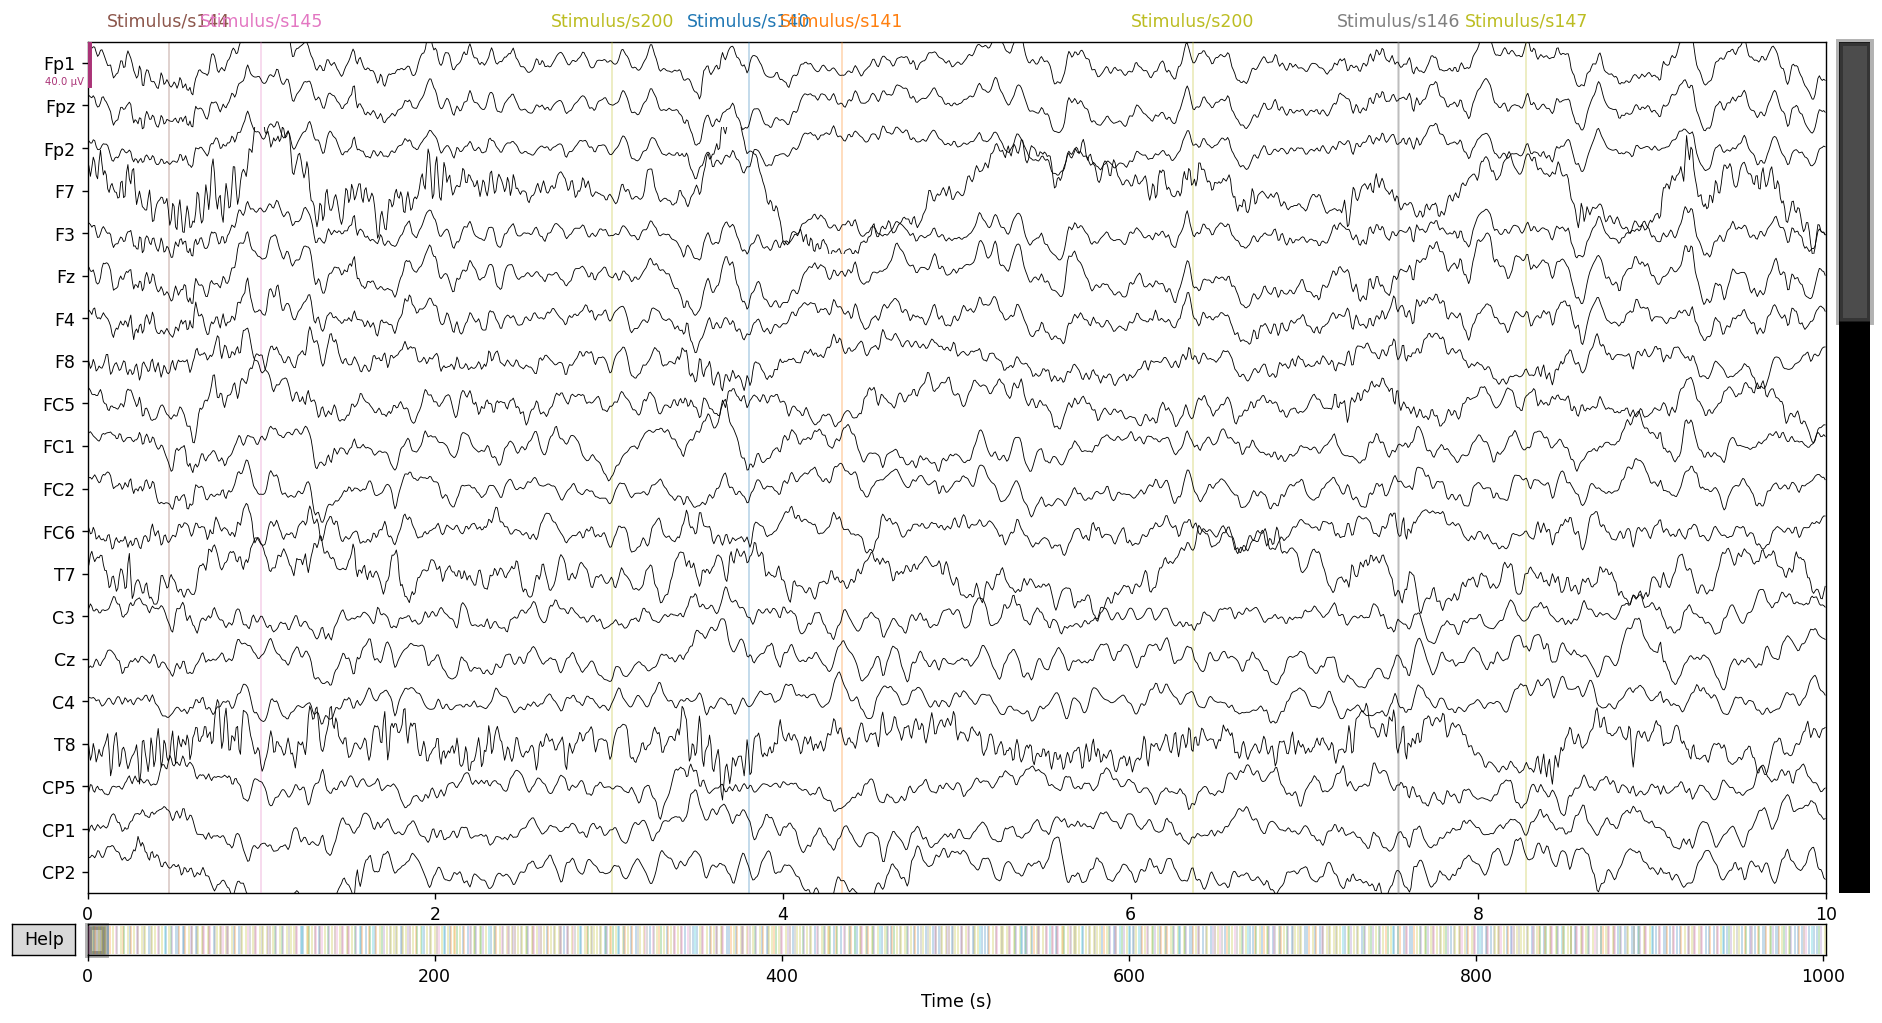

In [25]:
raw_cleaned.plot()